**FOREST FIRE PREDICTION**

Forest fire prediction model is created to predict in which areas of forest fire had occured. If occured then what distance what other it have coverd and damaged. 
So to predict this I have used knn classifier and random forest classifier to class the details about the forest fire and make perfect predictions.

**Importing Libraries**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline


#warning 
import warnings
warnings.filterwarnings('ignore')


**Reading Dataset**

In [2]:
forest_fire = pd.read_csv('covtype.csv')
forest_fire

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [3]:
forest_fire.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


**Exploratory Data Analysis**

In [4]:
print(forest_fire.columns)

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [5]:
#forest_fire.shape

In [6]:
forest_fire.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [7]:
forest_fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [8]:
forest_fire.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [9]:
forest_fire['Cover_Type'].value_counts()

Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64

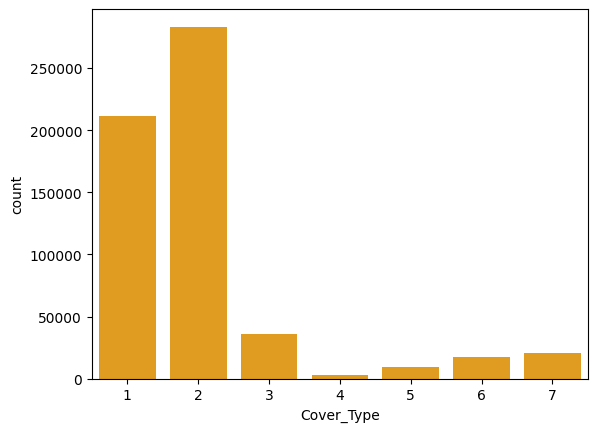

In [10]:
sns.countplot(x='Cover_Type', data =forest_fire, color='orange')
plt.show()

In [11]:
continous_variables = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points']

In [12]:
categorical_variables = ['Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40', 'Cover_Type']

In [13]:
wilderness = forest_fire[['Cover_Type', 'Wilderness_Area1',
                         'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']]

wilderness_long = pd.melt(wilderness, id_vars='Cover_Type', var_name='Wilderness_Area', value_name='Area')
wilderness_pivot = pd.pivot_table(wilderness_long, index='Cover_Type', columns='Wilderness_Area', values='Area', aggfunc='sum')
wilderness_pivot

Wilderness_Area,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
Cover_Type,,,,
1,105717,18595,87528,0
2,146197,8985,125093,3026
3,0,0,14300,21454
4,0,0,0,2747
5,3781,0,5712,0
6,0,0,7626,9741
7,5101,2304,13105,0


In [14]:
wilderness_long

,Cover_Type,Wilderness_Area,Area
0,5,Wilderness_Area1,1
1,5,Wilderness_Area1,1
2,2,Wilderness_Area1,1
3,2,Wilderness_Area1,1
4,5,Wilderness_Area1,1
...,...,...,...
2324043,3,Wilderness_Area4,0
2324044,3,Wilderness_Area4,0
2324045,3,Wilderness_Area4,0
2324046,3,Wilderness_Area4,0


Text(0.5, 1.0, 'Wilderness Area for different forest cover types')

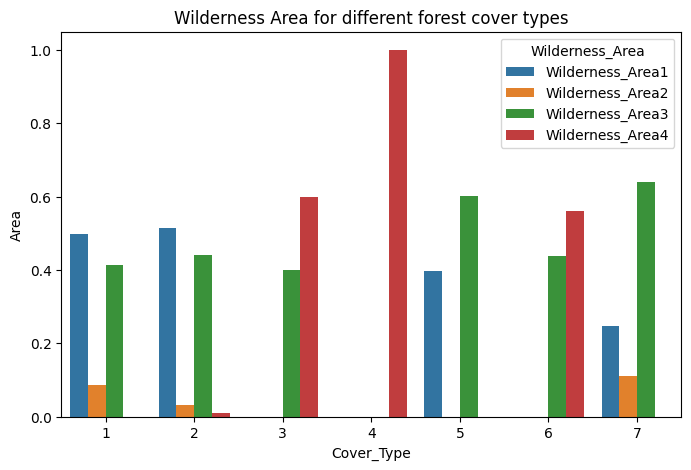

In [15]:
plt.figure(figsize=[8,5])
sns.barplot(x='Cover_Type', y='Area', hue='Wilderness_Area', data = wilderness_long, ci=None)
plt.title('Wilderness Area for different forest cover types')

In [16]:
# same analysis for soil types 

soil_types = forest_fire[[
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40', 'Cover_Type']]

soil_types.head()

,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [17]:
soil_long = pd.melt(soil_types, id_vars = "Cover_Type", var_name = "Soil Types", value_name = "Soil_Types")
soil_long
soil_long['Soil Type Number']= soil_long['Soil Types'].str.replace('Soil_Type','')
soil_long['Soil Type Number']= pd.to_numeric(soil_long['Soil Type Number'])
soil_long

,Cover_Type,Soil Types,Soil_Types,Soil Type Number
0,5,Soil_Type1,0,1
1,5,Soil_Type1,0,1
2,2,Soil_Type1,0,1
3,2,Soil_Type1,0,1
4,5,Soil_Type1,0,1
...,...,...,...,...
23240475,3,Soil_Type40,0,40
23240476,3,Soil_Type40,0,40
23240477,3,Soil_Type40,0,40
23240478,3,Soil_Type40,0,40


In [18]:
soil_type_pivot = pd.pivot_table(soil_long, index='Cover_Type', columns='Soil Type Number', values='Soil_Types', aggfunc='sum')
soil_type_pivot

Soil Type Number,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,182,0,0,0,43,161,956,...,11863,21358,18148,94,931,14,0,8729,7882,4826
2,0,852,1191,3251,0,912,105,136,986,10803,...,13209,29556,25308,1431,12,42,0,740,358,332
3,2101,4991,2411,7501,967,3993,0,0,0,11532,...,0,106,5,0,0,0,0,0,0,0
4,178,115,1018,168,48,320,0,0,0,224,...,0,0,0,0,0,0,0,0,0,0
5,0,264,0,585,0,0,0,0,0,260,...,309,460,518,20,0,0,0,0,0,0
6,752,1303,203,631,582,1350,0,0,0,8859,...,63,200,539,15,0,0,0,0,0,0
7,0,0,0,78,0,0,0,0,0,0,...,222,839,636,51,948,63,298,6104,5566,3592


In [19]:
list(enumerate(soil_type_pivot.index))

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7)]

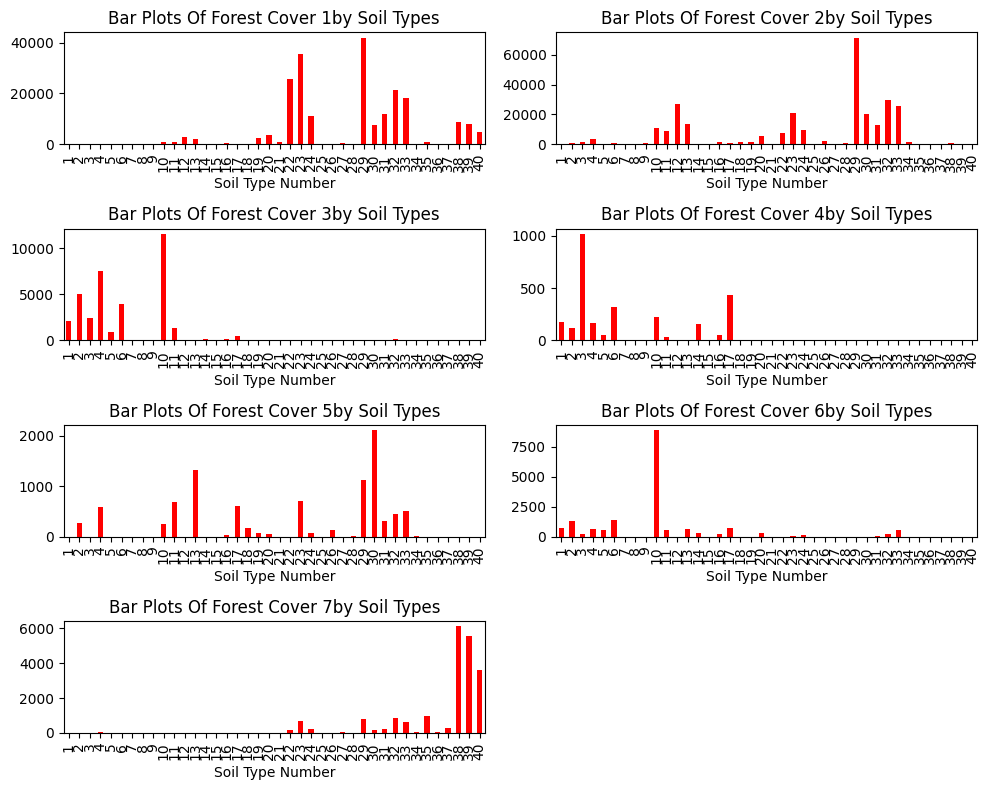

In [20]:
plt.figure(figsize=(10,8))
for i in enumerate(soil_type_pivot.index):
    plt.subplot(4,2,i[0]+1)
    soil_type_pivot.loc[i[1]].plot(kind='bar', color = 'red')
    plt.title(f'Bar Plots Of Forest Cover {i[1]}by Soil Types')
plt.tight_layout()

In [21]:
list(enumerate(continous_variables))

[(0, 'Elevation'),
 (1, 'Aspect'),
 (2, 'Slope'),
 (3, 'Horizontal_Distance_To_Hydrology'),
 (4, 'Vertical_Distance_To_Hydrology'),
 (5, 'Horizontal_Distance_To_Roadways'),
 (6, 'Hillshade_9am'),
 (7, 'Hillshade_Noon'),
 (8, 'Hillshade_3pm'),
 (9, 'Horizontal_Distance_To_Fire_Points')]

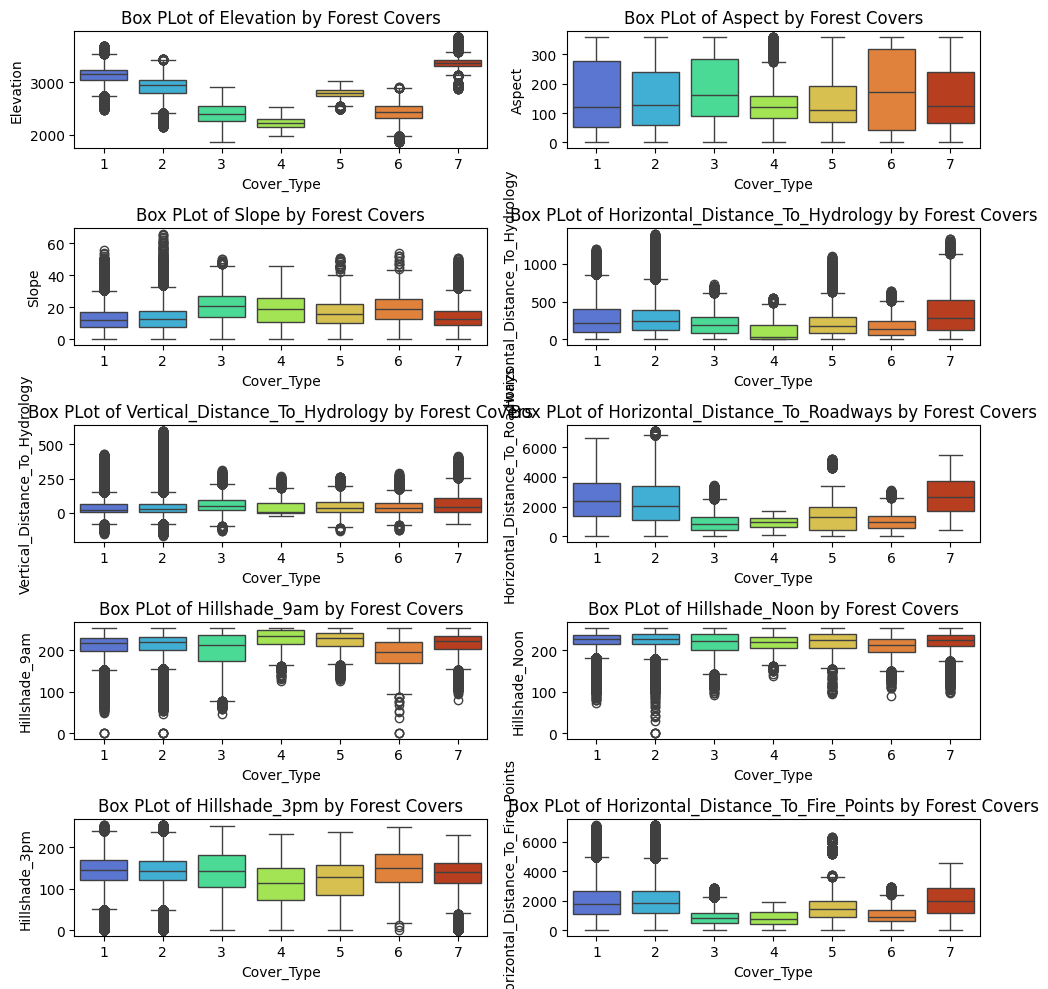

In [22]:
plt.figure(figsize=(10,10))
for i in enumerate(continous_variables):
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(x= forest_fire['Cover_Type'], y= forest_fire[i[1]], palette='turbo')
    plt.title(f'Box PLot of {i[1]} by Forest Covers')
plt.tight_layout()

In [23]:
# correlation and headtmap
corr = forest_fire[continous_variables].corr()

<Axes: >

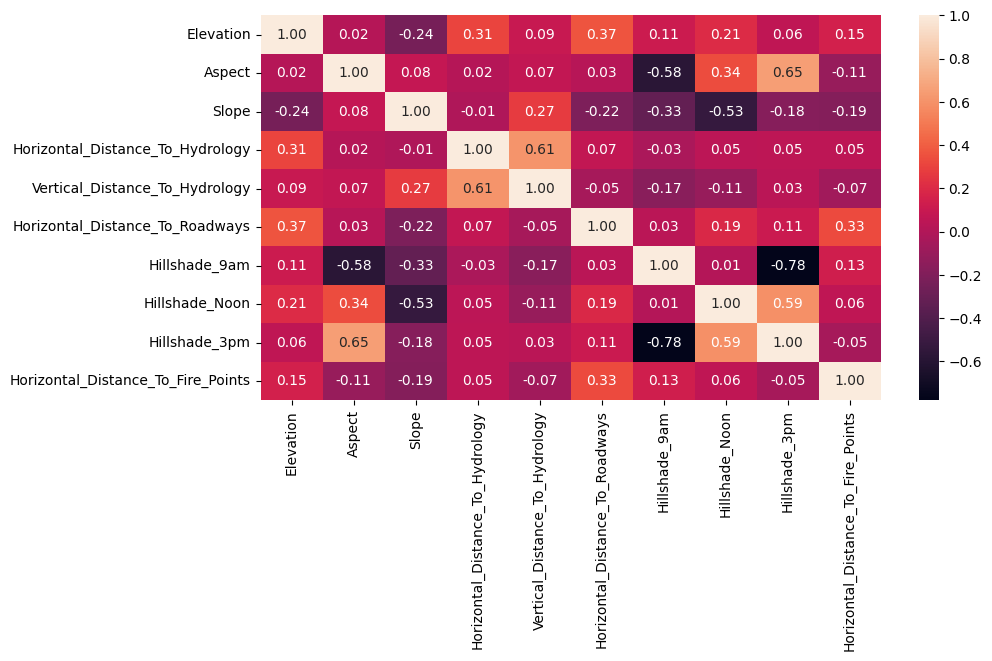

In [24]:
##corelation between continous variables 
plt.figure(figsize = (10,5))
sns.heatmap(corr, annot=True, fmt = '.2f')

In [25]:
forest_fire

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [26]:
scaler = StandardScaler()
scaler.fit(forest_fire[continous_variables])

StandardScaler()

In [27]:
scaled_features = scaler.transform(forest_fire[continous_variables])
scaled_features

array([[-1.29780509, -0.93515698, -1.48281978, ...,  0.43914331,
         0.1429604 ,  3.24628306],
       [-1.31923485, -0.89047967, -1.61636259, ...,  0.59089851,
         0.22134157,  3.20550354],
       [-0.5549068 , -0.14883628, -0.68156292, ...,  0.74265371,
        -0.19669136,  3.1269652 ],
       ...,
       [-2.04784663,  0.02987297,  0.38677957, ...,  0.89440891,
        -0.32732665, -0.85054846],
       [-2.05498988,  0.12816306,  0.11969395, ...,  1.09674918,
         0.01232511, -0.8429967 ],
       [-2.05856151,  0.08348575, -0.14739167, ...,  1.04616411,
        -0.03992901, -0.83468976]])

In [28]:
forest_fire_feat = pd.DataFrame(scaled_features, columns = continous_variables)
forest_fire_feat.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,-1.297805,-0.935157,-1.482820,-0.053767,-0.796273,-1.180146,0.330743,0.439143,0.142960,3.246283
1,-1.319235,-0.890480,-1.616363,-0.270188,-0.899197,-1.257106,0.293388,0.590899,0.221342,3.205504
2,-0.554907,-0.148836,-0.681563,-0.006719,0.318742,0.532212,0.816364,0.742654,-0.196691,3.126965
3,-0.622768,-0.005869,0.520322,-0.129044,1.227908,0.474492,0.965786,0.742654,-0.536343,3.194931
4,-1.301377,-0.988770,-1.616363,-0.547771,-0.813427,-1.256464,0.293388,0.540313,0.195215,3.165479


In [29]:
scaled_forest_fire = pd.concat([forest_fire_feat, soil_types], axis=1)
scaled_forest_fire

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,-1.297805,-0.935157,-1.482820,-0.053767,-0.796273,-1.180146,0.330743,0.439143,0.142960,3.246283,...,0,0,0,0,0,0,0,0,0,5
1,-1.319235,-0.890480,-1.616363,-0.270188,-0.899197,-1.257106,0.293388,0.590899,0.221342,3.205504,...,0,0,0,0,0,0,0,0,0,5
2,-0.554907,-0.148836,-0.681563,-0.006719,0.318742,0.532212,0.816364,0.742654,-0.196691,3.126965,...,0,0,0,0,0,0,0,0,0,2
3,-0.622768,-0.005869,0.520322,-0.129044,1.227908,0.474492,0.965786,0.742654,-0.536343,3.194931,...,0,0,0,0,0,0,0,0,0,2
4,-1.301377,-0.988770,-1.616363,-0.547771,-0.813427,-1.256464,0.293388,0.540313,0.195215,3.165479,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,-2.012130,-0.023740,0.787408,-0.867697,-0.504653,-1.437962,1.040496,0.692069,-0.640851,-0.863386,...,0,0,0,0,0,0,0,0,0,3
581008,-2.029988,-0.032675,0.653865,-0.952383,-0.590424,-1.446299,1.040496,0.692069,-0.614724,-0.857345,...,0,0,0,0,0,0,0,0,0,3
581009,-2.047847,0.029873,0.386780,-0.985317,-0.676194,-1.449506,0.891075,0.894409,-0.327327,-0.850548,...,0,0,0,0,0,0,0,0,0,3
581010,-2.054990,0.128163,0.119694,-0.985317,-0.710502,-1.449506,0.666942,1.096749,0.012325,-0.842997,...,0,0,0,0,0,0,0,0,0,3


***Train Test Split***

In [30]:
X = scaled_forest_fire.drop(columns=['Cover_Type'])
Y = scaled_forest_fire['Cover_Type']

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=100)

print('X_train.shape', X_train.shape)
print('Y_train.shape', Y_train.shape)
print('X_test.shape', X_test.shape)
print('Y_test.shape', Y_test.shape)

X_train.shape (464809, 50)
Y_train.shape (464809,)
X_test.shape (116203, 50)
Y_test.shape (116203,)


**KNN Classification**

In [32]:
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train,Y_train)
pred = KNN.predict(X_test)
print(pred)

[2 5 1 ... 3 1 1]


[[39687  2485     3     0    41     9   221]
 [ 2457 53491   166     1   262   182    33]
 [    3   178  6464    78    17   393     0]
 [    0     1    76   467     0    27     0]
 [   38   273    25     0  1505     6     0]
 [    9   151   355    33    13  2895     0]
 [  198    33     0     0     1     0  3926]] 
               precision    recall  f1-score   support

           1       0.94      0.93      0.94     42446
           2       0.94      0.95      0.95     56592
           3       0.91      0.91      0.91      7133
           4       0.81      0.82      0.81       571
           5       0.82      0.81      0.82      1847
           6       0.82      0.84      0.83      3456
           7       0.94      0.94      0.94      4158

    accuracy                           0.93    116203
   macro avg       0.88      0.89      0.88    116203
weighted avg       0.93      0.93      0.93    116203



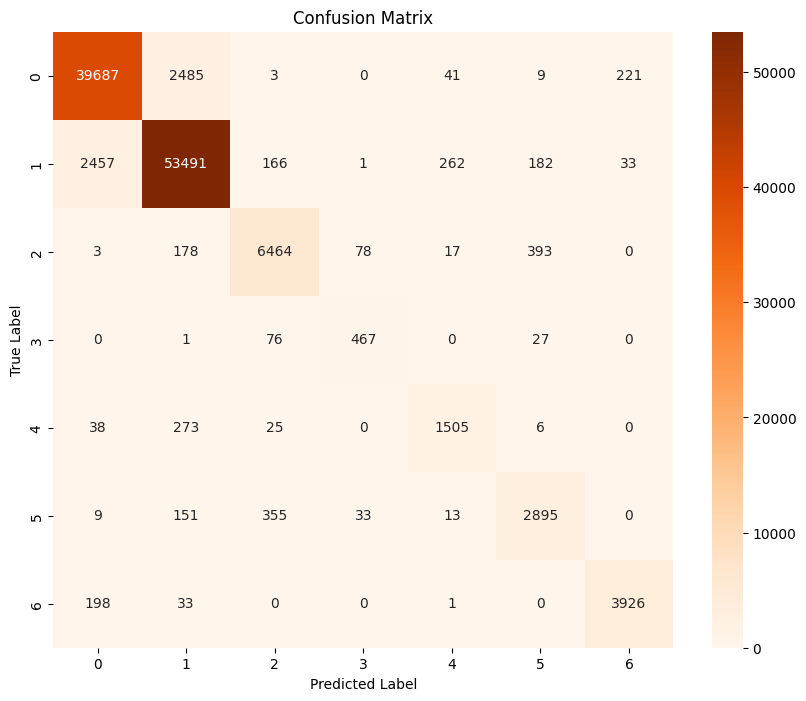

In [33]:
cm = confusion_matrix(Y_test, pred)
print(cm, '\n', classification_report(Y_test, pred))
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**Random Forest Classicication**

In [35]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

#separate features and target
feature = forest_fire.iloc[:, :54] #Features of data
Y = forest_fire.iloc[:, 54]  #Target of data

# Features Reduction
ETC = ExtraTreesClassifier()
ETC = ETC.fit(feature, Y)

model = SelectFromModel(ETC, prefit=True)
X = model.transform(feature)

In [36]:
X.shape

(581012, 12)

Accuracy --  95.3804979217404


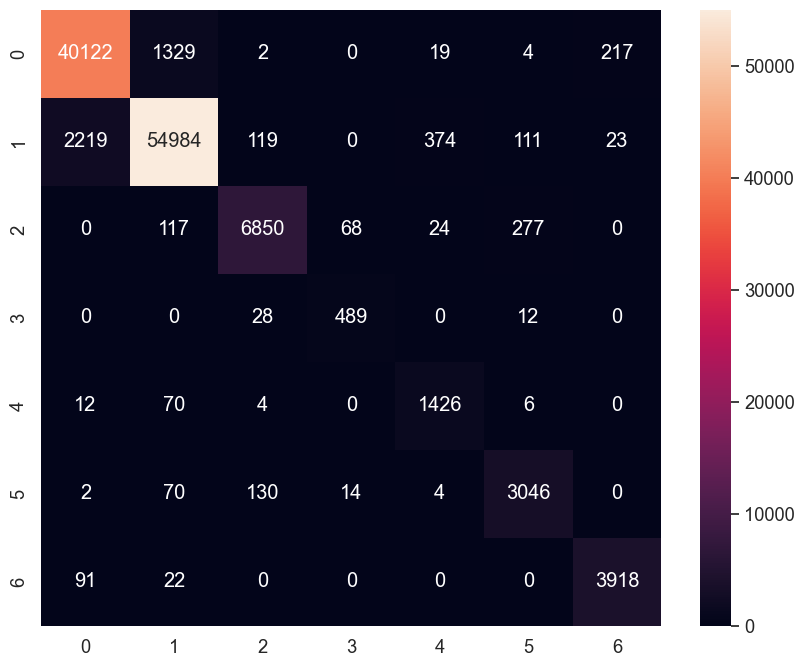

In [37]:
RFC = RandomForestClassifier(n_estimators=100)

#fit
RFC.fit(X_train, Y_train)

#prediction
y_pred = RFC.predict(X_test)

#score
print("Accuracy -- ", RFC.score(X_test, Y_test)*100)

#confusion
cm = confusion_matrix(y_pred, Y_test)
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()